# ติดตั้ง Tool

---



In [ ]:
!pip install pythainlp
!pip install torch==1.13.1
!pip install torchtext==0.6.0

import torchtext
torchtext.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 1.13.1 which is incompatible.
accelerate 1.3.0 requires torch>=2.0.0, but you have torch 1.13.1 which is incompatib

'0.6.0'

# Prepare Dataset

---


In [ ]:
! gdown --id 1xGvtr_HZLKHj4Emd4cbmndW3UBSkZfE8
! gdown --id 1Dmn0eyYwy9Z8r94Xy7eVdyWTBxG-1RIo
! gdown --id 1EX6IckcRLeKxhpJW4Cr7ItamonDdlyvN
! gdown --id 1ahlb_JE4TtrrEtkX65yLOoYEtcsxkj6m

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xGvtr_HZLKHj4Emd4cbmndW3UBSkZfE8
To: /content/TextClass.csv
100% 132k/132k [00:00<00:00, 4.43MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dmn0eyYwy9Z8r94Xy7eVdyWTBxG-1RIo
To: /content/pos.txt
100% 761k/761k [00:00<00:00, 7.45MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.goog

In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('pos.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: pos.txt not found.")
    exit()


data = {'text': lines, 'label': [0] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('pos.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created pos.csv")


Successfully created pos.csv


In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('neu.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: neu.txt not found.")
    exit()


data = {'text': lines, 'label': [1] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('neu.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created neu.csv")


Successfully created neu.csv


In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('neg.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: neg.txt not found.")
    exit()


data = {'text': lines, 'label': [2] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('neg.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created neg.csv")


Successfully created neg.csv


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('pos.csv')
except FileNotFoundError:
    print("Error: pos.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(250)

# Save the reduced DataFrame to a new CSV file
df.to_csv('pos_reduced.csv', index=False, encoding='utf-8')
print("Successfully created pos_reduced.csv with 1000 random samples.")


Successfully created pos_reduced.csv with 1000 random samples.


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('neu.csv')
except FileNotFoundError:
    print("Error: pos.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(200)

# Save the reduced DataFrame to a new CSV file
df.to_csv('neu_reduced.csv', index=False, encoding='utf-8')
print("Successfully created neu_reduced.csv with 1000 random samples.")


Successfully created neu_reduced.csv with 1000 random samples.


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('neg.csv')
except FileNotFoundError:
    print("Error: neg.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(300)

# Save the reduced DataFrame to a new CSV file
df.to_csv('neg_reduced.csv', index=False, encoding='utf-8')
print("Successfully created neg_reduced.csv with 1000 random samples.")


Successfully created neg_reduced.csv with 1000 random samples.


In [ ]:
# prompt: รวมไฟล์ textclass, pos.csv, neu.csv

import pandas as pd

# Assuming 'textclass.csv', 'pos.csv', and 'neu.csv' are in the current directory
try:
    df_textclass = pd.read_csv('TextClass.csv')
    df_pos = pd.read_csv('pos_reduced.csv')
    df_neu = pd.read_csv('neu_reduced.csv')
    df_neg = pd.read_csv('neg_reduced.csv')

    # Concatenate the DataFrames
    combined_df = pd.concat([df_textclass, df_pos, df_neu, df_neg], ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv('TextClass.csv', index=False, encoding='utf-8')
    print("Successfully combined and saved to 'TextClass.csv'")

except FileNotFoundError:
    print("Error: One or more of the required CSV files not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Successfully combined and saved to 'TextClass.csv'


In [ ]:
import pandas as pd

# ตั้งค่า path ของไฟล์
file_path = '/content/TextClass.csv'


# โหลดไฟล์ CSV เป็น DataFrame
data = pd.read_csv(file_path)


#เปลี่ยนชื่อ labels
new_labels = {
    0: "คำทั่วไปทางการชม",
    1: "คำทั่วไป",
    2: "คำหยาบปกติ",
    3: "เหยียดรูปร่าง",
    4: "เหยียดชนชั้น",
    5: "เหยียดเพศ"
}

data['label'] = data['label'].map(new_labels)
data = data.rename(columns={'text': 'review'})
# แสดงข้อมูล
data

,review,label
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม
...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ


In [ ]:
data

,review,label
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม
...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ


In [ ]:
# # Training configurations
# SEED = 1234
# TRAIN = False
# BATCH_SIZE = 64
# N_EPOCHS = 200

# # Architecture
# EMBEDDING_DIM = 128
# HIDDEN_DIM = 512
# OUTPUT_DIM = 6
# N_LAYERS = 2
# BIDIRECTIONAL = True
# DROPOUT = 0.25

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# # Bert model and its tokenizer
# # Text data
# from torchtext import data, datasets
# # Numerical computation
# import numpy as np
# # standard library
# import random
# import time
# # Configuration
# #from config import *

# # Set random seed for reproducible experiments
# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.backends.cudnn.deterministic = True

# import pandas as pd
# import re
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# import math
# import nltk
# from sklearn.feature_extraction.text import CountVectorizer
# from collections import defaultdict

In [ ]:
import re
import pandas as pd
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_stopwords

# โหลดข้อมูล (ต้องระบุไฟล์ CSV ที่ใช้)

def deEmojify(text):
    """ลบ Emoji ออกจากข้อความ"""
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols, Symbols for Legacy Computing, etc.
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_stop_word(text):
    """ลบ stop words ออกจากข้อความ"""
    stop_words = set(thai_stopwords())
    return ' '.join([word for word in text.split() if word not in stop_words])

def thai_clean_text(text):
    """ทำความสะอาดข้อความภาษาไทย"""
    if not isinstance(text, str) or text.strip() == "":
        return ""

    # ลบ Emoji
    text = deEmojify(text)

    # ลบอักขระพิเศษ
    text = re.sub(r'[.!@#%^&*()<>?/|}{~:]', '', text)

    # ลบตัวเลข
    text = re.sub(r'\d+', '', text)

    # ตัดคำ (Tokenization)
    words = word_tokenize(text, keep_whitespace=False)

    # ลบตัวอักษรที่ซ้ำกันเกิน 3 ตัว เช่น "มากกกก" → "มากกก"
    words = [re.sub(r'([ก-ฮ])\1{3,}', r'\1\1\1', word) for word in words]

    # ลบสระที่ซ้ำกันทิ้ง
    words = [re.sub(r'([ะ-ูเ-ไ็-๋ๆ])\1{2,}', r'\1\1', word) for word in words]

    # ลบคำที่เหลือแต่ตัวอักษรซ้ำ เช่น "นนนนนนน" → ลบทิ้ง
    words = [word for word in words if not re.fullmatch(r'([ก-ฮ])\1+', word)]

    # ลบ stop words
    # words = [word for word in words if word not in thai_stopwords()]

    return ' '.join(words).strip()

# ทำความสะอาดคอลัมน์ review
data['cleaned_review'] = data['review'].astype(str).apply(thai_clean_text)

# บันทึกผลลัพธ์
data.to_csv('cleaned_data.csv', index=False, encoding='utf-8')

# แสดงตัวอย่างข้อมูลที่ทำความสะอาดแล้ว
print(data.sample(5))


                                                 review             label  \
1169                                                ต่ำ      เหยียดชนชั้น   
2242  ตอนนี้คือเบลนด์ เบลนด์คือเคยแดกแล้วแพ้นอนบนพื้...        คำหยาบปกติ   
1559                                    แถวพระราม2ค่ะ\n  คำทั่วไปทางการชม   
549              มีแต่ของแดกลดเว้ยตูนเว้ย อัญชลี วงษ์ดี          คำทั่วไป   
770   ข้างซองบุหรี่เขียนยาดองศพตัวเท่าควาย เสือกขายไ...        คำหยาบปกติ   

                                         cleaned_review  
1169                                                ต่ำ  
2242  ตอนนี้ คือ เบลนด์ เบลนด์ คือ เคย แดก แล้ว แพ้ ...  
1559                                     แถว พระราม ค่ะ  
549      มี แต่ ของ แด กลด เว้ย ตูน เว้ย อัญชลี วงษ์ ดี  
770   ข้าง ซองบุหรี่ เขียน ยาดอง ศพ ตัว เท่า ควาย เส...  


In [ ]:
data

,review,label,cleaned_review
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม,พี่ เบ๊บ บี้ จัด ฟัน แล้ว น่ารัก สุด ๆๆ
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม,พี่ เบ๊บ บี้ จัด ฟัน น่ารัก มา
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม,พี่ สวย มาก ค่ะ
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม,งาม มา ลูกสาว
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม,คนสวย
...,...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ,กู เข ด และ เน๊าะ โปร วัน พุธ มะ เติม ของ เลย ...
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ,โห้ ไม่ เคย เจอ ฟอร์จูน crv pajero ตามหลัง เลย...
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ,Mazda cx- ใหม่ คือ ไม่ ไหว อะ เห็น ละ ทน ไม่ ไ...
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ,แดก เบียร์ เหล้า กู เอียน สปาย


In [ ]:
# Training configurations
SEED = 1234
TRAIN = False
BATCH_SIZE = 32
N_EPOCHS = 200

# Architecture
EMBEDDING_DIM = 128
HIDDEN_DIM = 512
OUTPUT_DIM = 6
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# Bert model and its tokenizer
# Text data
from torchtext import data, datasets
# Numerical computation
import numpy as np
# standard library
import random
import time
# Configuration
#from config import *

# Set random seed for reproducible experiments
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
import numpy as np

import time
import random
import functools
import math

from torchtext.data import Field, Dataset, Example
import pandas as pd

class DataFrameDataset(Dataset):
    """Class for using pandas DataFrames as a datasource"""
    def __init__(self, examples, fields, filter_pred=None):
        """
        Create a dataset from a pandas dataframe of examples and Fields
        Arguments:
            examples pd.DataFrame: DataFrame of examples
            fields {str: Field}: The Fields to use in this tuple. The
                string is a field name, and the Field is the associated field.
            filter_pred (callable or None): use only exanples for which
                filter_pred(example) is true, or use all examples if None.
                Default is None
        """
        self.examples = examples.apply(SeriesExample.fromSeries, args=(fields,), axis=1).tolist()
        if filter_pred is not None:
            self.examples = filter(filter_pred, self.examples)
        self.fields = dict(fields)
        # Unpack field tuples
        for n, f in list(self.fields.items()):
            if isinstance(n, tuple):
                self.fields.update(zip(n, f))
                del self.fields[n]

class SeriesExample(Example):
    """Class to convert a pandas Series to an Example"""

    @classmethod
    def fromSeries(cls, data, fields):
        return cls.fromdict(data.to_dict(), fields)

    @classmethod
    def fromdict(cls, data, fields):
        ex = cls()

        for key, field in fields.items():
            if key not in data:
                raise ValueError("Specified key {} was not found in "
                "the input data".format(key))
            if field is not None:
                setattr(ex, key, field.preprocess(data[key]))
            else:
                setattr(ex, key, data[key])
        return ex

In [ ]:
import pandas as pd # Make sure pandas is imported

# Load your data into a DataFrame, assuming your CSV file is named 'your_data.csv'
data = pd.read_csv('cleaned_data.csv')

reviews = data['cleaned_review'].values
labels = data['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels,test_size=0.2, random_state=1234)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

val_size = int(len(test_sentences)/2)
train = list(train_sentences)[:(len(train_sentences)-val_size)]
val = list(train_sentences)[(len(train_sentences)-val_size):]
test = list(test_sentences)

print("Train set:", train[:5])
print("Validation set:", val[:5])
print("Test set:", test[:5])
print("Number of training examples:", len(train))
print("Number of validation examples:", len(val))
print("Number of test examples:", len(test))

Train set: ['ปะ ๆ', 'ของ ที่ เดอะ ร็อค เล่น ก็ สนุก ที่ แผ่นดินไหว แล้ว มี สึนามิ', 'คน ไม่ ใช่ ก็ คง ต้อง รอ ต่อไป แอด หงส์ทอง', 'สวย จริงๆ ๆๆ คะ เด ืน ไม่ เบื่อ ผู้คน น่ารัก', 'อยาก']
Validation set: ['ซี แก รม', 'อิ ตุ๊ด เอ้ย', 'อร่อย มาก ค่ะ คอนเฟิร์ม', 'เก็บ เงิน', 'ถึง']
Test set: ['มัน เป็น ญาติ กับ ไอ้ ฤทธิ์ กิน เเบล็ค ใช่ มั้ย', 'ฟิน ค่ะ', 'มา ร่วมกัน ร่วม เล่น สนุก ขับ นิสสัน กัน เถอะ', 'ชี้ อ เหล้า ให้ มัน แดก อยู่ บ่อย กู รู้ แต่ เวลา มัน แดก เอง มัน ล่อ แสงโสม เวลา มัน ให้ กู ชี้ อให่ มัน แดก black lable สาด', 'แท็กซี่ คือ จะ เปิด แอร์ ให้ หนาว ตาย เลย ใช่ปะ ฝึก ความอดทน ถุก ปะ']
Number of training examples: 1610
Number of validation examples: 230
Number of test examples: 460


In [ ]:
import pandas as pd
import os

# Assuming 'train_sentences', 'train_labels', 'val', 'test', 'test_labels' are still available from previous cells

# สร้าง DataFrame สำหรับ train, val, test
train_df = pd.DataFrame({'review': train_sentences, 'label': train_labels}) # Use train_sentences instead of train
val_df = pd.DataFrame({'review': val, 'label': train_labels[len(train_sentences)-len(val):]})  # Use len(train_sentences) to index correctly
test_df = pd.DataFrame({'review': test, 'label': test_labels})

# รวมคอลัมน์ 'review' และ 'label' เพื่อระบุข้อมูลที่ซ้ำกัน
train_df['combined'] = train_df['review'] + train_df['label'].astype(str)
val_df['combined'] = val_df['review'] + val_df['label'].astype(str)

# ลบข้อมูลที่ซ้ำกันใน train_df
train_df = train_df[~train_df['combined'].isin(val_df['combined'])]

# ลบคอลัมน์ 'combined' ออก
train_df = train_df.drop(columns=['combined'])
val_df = val_df.drop(columns=['combined'])

os.makedirs('datasets', exist_ok=True)

# บันทึก DataFrame เป็นไฟล์ CSV
train_df.to_csv('datasets/train.csv', index=False)
val_df.to_csv('datasets/val.csv', index=False)
test_df.to_csv('datasets/test.csv', index=False)

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
# init_token_id = 1  #เริ่มต้นประโยค
# pad_token_id = 0  #pad_id ตอนเทรนจะเติมเข้าไปกรณีบางประโยคสั้นกว่าประโยคอื่น
# unk_token_id=2 # กรณีไม่พบคำศัพท์จะแทนด้วย 2 นี้
# max_input_len = 512 # ความยาวสูงสุดที่โมเดลสามารภทำนายได้

# #create vocab_dict
# vocab = []
# for i in range( train_sentences.shape[0]):
#     ws = train_sentences[i].split(" ")
#     for w in ws:
#         if w not in vocab:
#             vocab.append(w)

In [ ]:
init_token_id = 1  #เริ่มต้นประโยค
pad_token_id = 0  #pad_id ตอนเทรนจะเติมเข้าไปกรณีบางประโยคสั้นกว่าประโยคอื่น
unk_token_id=2 # กรณีไม่พบคำศัพท์จะแทนด้วย 2 นี้
max_input_len = 512 # ความยาวสูงสุดที่โมเดลสามารภทำนายได้

#create vocab_dict
vocab = []
for i in range(train_sentences.shape[0]):
    # Check if the element is a string before splitting
    if isinstance(train_sentences[i], str):
        ws = train_sentences[i].split(" ")
        for w in ws:
            if w not in vocab:
                vocab.append(w)
    else:
        # Handle non-string elements (e.g., print a warning or skip them)
        print(f"Warning: Element at index {i} is not a string: {train_sentences[i]}")

In [ ]:
vocab.sort()
start_word_id = 3
token_to_id = {val: (i+start_word_id) for i, val in enumerate(vocab)}

token_to_id.update({'init_id': init_token_id, 'pad_id':pad_token_id,'unk_id':unk_token_id})

In [ ]:
import json
vocab_json_object = json.dumps(token_to_id)
with open("token2idx.json", "w") as outfile:
    outfile.write(vocab_json_object)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [ ]:
import json
import numpy as np

import time
import random
import functools
import math

from torchtext.data import Field, Dataset, Example,LabelField
import pandas as pd # Make sure pandas is imported

# Tokensize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = sentence.split(" ")
  tokens = tokens[:max_input_len - 2]
  return tokens

def convert_tokens_to_ids(tokens):
    out_id = []
    for w in tokens:
        if w in token_to_id.keys():
            out_id.append(token_to_id[w])
        else:
            out_id.append(unk_token_id) #unk word
    if len(out_id)==0:
        return [0]
    return out_id

def load_data():
  text = Field(
    batch_first=True,
    use_vocab=False,
    tokenize=tokenize_and_crop,
    preprocessing=convert_tokens_to_ids,
    init_token=init_token_id,
    pad_token=pad_token_id,
    unk_token=unk_token_id
  )
  # Load the cleaned data CSV into a DataFrame
  cleaned_data_df = pd.read_csv('cleaned_data.csv')  # Load the preprocessed data

  label = LabelField(dtype=torch.long)

  # label = torchtext.data.LabelField(dtype=torch.float)

  fields = { 'cleaned_review' : text, 'label' : label }

  # Change 'data' to 'cleaned_data_df' to reference the DataFrame
  cleaned_data_df['cleaned_review'] = cleaned_data_df['cleaned_review'].astype(str)  # Convert to string
  examples = cleaned_data_df.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

  # Update train_ds to use the cleaned data
  train_ds = Dataset(examples, fields) # Pass examples directly instead of creating a DataFrameDataset with `cleaned_data_df`

  # Use 'cleaned_data_df' for stratification instead of 'data'
  train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=cleaned_data_df['label'])
  train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples])

  # Create datasets from the split examples
  _train_data = Dataset(train_examples, fields)
  _test_data = Dataset(test_examples, fields)
  _valid_data = Dataset(val_examples, fields)


  print(f"training examples count: {len(_train_data)}")
  print(f"test examples count: {len(_test_data)}")
  print(f"validation examples count: {len(_valid_data)}")

  label.build_vocab(_train_data)

  lab_data = {v: k for k, v in label.vocab.stoi.items()}
  with open('idx2lab.json', 'w') as f:
      json.dump(lab_data, f)



  # Use torchtext.data.BucketIterator directly
  # Change from data.BucketIterator to torchtext.data.BucketIterator
  train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
    (_train_data, _valid_data, _test_data),
    batch_size=BATCH_SIZE,
    device=device,
    sort_key = lambda x: len(x.cleaned_review),
    sort_within_batch=True
  )

  return train_iter, valid_iter, test_iter

In [ ]:
# load_data()

In [ ]:
# # Sentiment model contrain two-GRU layers for analyzing hidden representation
# # and a linear layer for classfification (the sigmoid is applied by the criterion during training).
# import torch.nn as nn

# class SentimentModel(nn.Module):
#   def __init__(
#     self,
#     vocab_size,
#     embedding_dim,
#     hidden_dim,
#     output_dim,
#     n_layers,
#     bidirectional,
#     dropout,
#     padding_id=0
#   ):

#     super(SentimentModel, self).__init__()

#     embedding_dim = embedding_dim
#     self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_id)

#     self.gru = nn.GRU(
#       embedding_dim,
#       hidden_dim,
#       num_layers=n_layers,
#       bidirectional=bidirectional,
#       batch_first=True,
#       dropout=0 if n_layers < 2 else dropout
#     )
#     self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
#     self.dropout = nn.Dropout(dropout)

#   def forward(self, text):

#     embedded = self.embedding(text)
#     _, hidden = self.gru(embedded)

#     if self.gru.bidirectional:
#       hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
#     else:
#       hidden = self.dropout(hidden[-1,:,:])

#     output = self.out(hidden)
#     return output

In [ ]:
# load_data()

In [ ]:
# Sentiment model contrain two-GRU layers for analyzing hidden representation
# and a linear layer for classfification (the sigmoid is applied by the criterion during training).
import torch.nn as nn

class SentimentModel(nn.Module):
  def __init__(
    self,
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout,
    padding_id=0
  ):

    super(SentimentModel, self).__init__()

    embedding_dim = embedding_dim
    self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_id)

    self.rnn = nn.RNN(
      embedding_dim,
      hidden_dim,
      num_layers=n_layers,
      bidirectional=bidirectional,
      batch_first=True,
      dropout=0 if n_layers < 2 else dropout
    )
    self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
    self.dropout = nn.Dropout(dropout)

  def forward(self, text):

    embedded = self.embedding(text)
    _, hidden = self.rnn(embedded)

    if self.rnn.bidirectional:
      hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
    else:
      hidden = self.dropout(hidden[-1,:,:])

    output = self.out(hidden)
    return output

In [ ]:
vocab_size = len(vocab) + 3

In [ ]:
model = SentimentModel(
  vocab_size,
  EMBEDDING_DIM,
  HIDDEN_DIM,
  OUTPUT_DIM,
  N_LAYERS,
  BIDIRECTIONAL,
  DROPOUT
)
print(model)
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

SentimentModel(
  (embedding): Embedding(4483, 128, padding_idx=0)
  (rnn): RNN(128, 512, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (out): Linear(in_features=1024, out_features=6, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


2812294

In [ ]:
from tqdm import tqdm
# time taken for single epoch
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time / 60)
  elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
  return elapsed_mins, elapsed_secs

# computes accuracy
def calculate_accuracy2(y_pred,y_true):
  y_pred = torch.round(y_pred)
  #print(y_pred.argmax(-1))
  correct = (y_true == y_pred.argmax(-1)).float()
  acc = correct.sum() / len(correct)
  return acc

# def binary_accuracy(preds, y):
#   rounded_preds = torch.round(torch.sigmoid(preds))
#   correct = (rounded_preds == y).float()
#   acc = correct.sum() / len(correct)
#   return acc

# training step
def train(model, iterator, optimizer, criterion):
  # stats
  epoch_loss = 0
  epoch_acc = 0
  # train mode
  model.train()

  for batch in tqdm(iterator):
    # train step
    optimizer.zero_grad()
    #print(batch.review)
    predictions = model(batch.cleaned_review).squeeze(1)
    loss = criterion(predictions, batch.label)
    acc = calculate_accuracy2(predictions, batch.label)
    loss.backward()
    optimizer.step()
    # stats
    epoch_loss += loss.item()
    epoch_acc += acc.item()

  return epoch_loss / len(iterator), epoch_acc / len(iterator)

# evaluates the model on given iterator (either
# train_iter, valid_iter, or test_iter)
def evaluate(model, iterator, criterion, encoder): # Add encoder as an argument

  epoch_loss = 0
  epoch_acc = 0
  # evaluation mode
  model.eval()
  y_true = []
  y_pred = []

  with torch.no_grad():
    for batch in iterator:
       #print(batch.text.shape)
       predictions = model(batch.cleaned_review).squeeze(1)
       loss = criterion(predictions, batch.label)
       acc = calculate_accuracy2(predictions, batch.label)
       epoch_loss += loss.item()
       epoch_acc += acc.item()

       y_true.extend(batch.label.cpu().numpy())  # Move to CPU and convert to NumPy
       y_pred.extend(predictions.argmax(-1).cpu().numpy())

       # No need to convert labels here, as we'll use classification_report later
       # for i in range(len(batch.label)):
       #          true_label = encoder.classes_[batch.label[i].item()]  # Use encoder.classes_ for labels
       #          pred_label = encoder.classes_[predictions[i].argmax().item()]  # Use encoder.classes_ for labels
       #          if true_label != pred_label:
       #              # Decode batch.text[i] to original text
       #              original_text = " ".join([k for k, v in token_to_id.items() if v in batch.text[i].tolist() and v not in [0, 1, 2]])
       #              # Print the results
       #              # print(f"Original Text: {original_text}")
       #              # print(f"True Label: {true_label}, Predicted Label: {pred_label}\n")

  return epoch_loss / len(iterator), epoch_acc / len(iterator), y_true, y_pred # Modified return statement to include y_true and y_pred

def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

In [ ]:
train_labels

array([1, 1, 0, ..., 2, 0, 2])

In [ ]:
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

   # นับจำนวนข้อมูลในแต่ละคลาส
label_counts = Counter(train_labels) # แทน train_labels ด้วย labels ของข้อมูล train

   # คำนวณน้ำหนักคลาส
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

   # แปลงเป็น dictionary
class_weight_dict = dict(zip(np.unique(train_labels), class_weights))
print(class_weight_dict)

{0: 0.6552706552706553, 1: 0.7131782945736435, 2: 0.7628524046434494, 3: 1.564625850340136, 4: 1.6666666666666667, 5: 1.9166666666666667}


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data loading
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Fit the encoder on your labels
encoder.fit(df['label']) # assuming 'df' is your DataFrame containing the original labels

train_losses = []
valid_losses = []
train_accs = []
valid_accs = []

all_y_true = []
all_y_pred = []

train_iter, valid_iter, test_iter = load_data()

optimizer = optim.Adam(model.parameters(),lr=0.000005)
class_weights_tensor = torch.tensor(list(class_weight_dict.values()), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

# criterion = nn.CrossEntropyLoss().to(device)
model = model.to(device)
# model.apply(reset_weights)

best_valid_loss = float('inf')

train_data = train

for epoch in range(N_EPOCHS):
  # start time
  start_time = time.time()
  # train for an epoch
  # train_loss, train_acc = train(model, train_iter, optimizer, criterion)
  # valid_loss, valid_acc, _, _ = evaluate(model, valid_iter, criterion)

  train_loss, train_acc = train(model, train_iter, optimizer, criterion)
  valid_loss, valid_acc, y_true, y_pred = evaluate(model, valid_iter, criterion, encoder)

  all_y_true.extend(y_true)
  all_y_pred.extend(y_pred)

  # end time
  end_time = time.time()
  # stats
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
  # เก็บข้อมูลการสูญเสียและความแม่นยำ
  train_losses.append(train_loss)
  valid_losses.append(valid_loss)
  train_accs.append(train_acc)
  valid_accs.append(valid_acc)
  # save model if has validation loss
  # better than last one
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'sentiment_model_gru.pt')
    print(f"Best model saved at epoch {epoch} with validation loss: {valid_loss:.4f}")
  # stats
  print(f'Epoch: {epoch+1:02}/{N_EPOCHS} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
  print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


training examples count: 1610
test examples count: 460
validation examples count: 230


100%|██████████| 51/51 [00:01<00:00, 29.27it/s]


Best model saved at epoch 0 with validation loss: 1.7912
Epoch: 01/200 | Epoch Time: 0m 1s
	Train Loss: 1.801 | Train Acc: 25.50%
	 Val. Loss: 1.791 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 70.35it/s]


Best model saved at epoch 1 with validation loss: 1.7800
Epoch: 02/200 | Epoch Time: 0m 0s
	Train Loss: 1.783 | Train Acc: 25.87%
	 Val. Loss: 1.780 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 94.13it/s]


Best model saved at epoch 2 with validation loss: 1.7686
Epoch: 03/200 | Epoch Time: 0m 0s
	Train Loss: 1.769 | Train Acc: 25.93%
	 Val. Loss: 1.769 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 96.20it/s]


Best model saved at epoch 3 with validation loss: 1.7575
Epoch: 04/200 | Epoch Time: 0m 0s
	Train Loss: 1.755 | Train Acc: 26.12%
	 Val. Loss: 1.757 |  Val. Acc: 27.73%


100%|██████████| 51/51 [00:00<00:00, 82.58it/s]


Best model saved at epoch 4 with validation loss: 1.7471
Epoch: 05/200 | Epoch Time: 0m 0s
	Train Loss: 1.741 | Train Acc: 26.85%
	 Val. Loss: 1.747 |  Val. Acc: 27.73%


100%|██████████| 51/51 [00:00<00:00, 75.53it/s]


Best model saved at epoch 5 with validation loss: 1.7365
Epoch: 06/200 | Epoch Time: 0m 0s
	Train Loss: 1.723 | Train Acc: 27.46%
	 Val. Loss: 1.737 |  Val. Acc: 28.12%


100%|██████████| 51/51 [00:00<00:00, 88.67it/s]


Best model saved at epoch 6 with validation loss: 1.7267
Epoch: 07/200 | Epoch Time: 0m 0s
	Train Loss: 1.701 | Train Acc: 28.08%
	 Val. Loss: 1.727 |  Val. Acc: 28.52%


100%|██████████| 51/51 [00:00<00:00, 92.26it/s]


Best model saved at epoch 7 with validation loss: 1.7163
Epoch: 08/200 | Epoch Time: 0m 0s
	Train Loss: 1.690 | Train Acc: 29.00%
	 Val. Loss: 1.716 |  Val. Acc: 29.30%


100%|██████████| 51/51 [00:00<00:00, 86.33it/s]


Best model saved at epoch 8 with validation loss: 1.7060
Epoch: 09/200 | Epoch Time: 0m 0s
	Train Loss: 1.670 | Train Acc: 29.73%
	 Val. Loss: 1.706 |  Val. Acc: 29.69%


100%|██████████| 51/51 [00:00<00:00, 94.03it/s]


Best model saved at epoch 9 with validation loss: 1.6959
Epoch: 10/200 | Epoch Time: 0m 0s
	Train Loss: 1.659 | Train Acc: 31.20%
	 Val. Loss: 1.696 |  Val. Acc: 30.08%


100%|██████████| 51/51 [00:00<00:00, 84.42it/s]


Best model saved at epoch 10 with validation loss: 1.6849
Epoch: 11/200 | Epoch Time: 0m 0s
	Train Loss: 1.641 | Train Acc: 32.44%
	 Val. Loss: 1.685 |  Val. Acc: 30.86%


100%|██████████| 51/51 [00:00<00:00, 100.32it/s]


Best model saved at epoch 11 with validation loss: 1.6740
Epoch: 12/200 | Epoch Time: 0m 0s
	Train Loss: 1.619 | Train Acc: 34.22%
	 Val. Loss: 1.674 |  Val. Acc: 31.25%


100%|██████████| 51/51 [00:00<00:00, 83.56it/s]


Best model saved at epoch 12 with validation loss: 1.6630
Epoch: 13/200 | Epoch Time: 0m 0s
	Train Loss: 1.607 | Train Acc: 35.75%
	 Val. Loss: 1.663 |  Val. Acc: 31.25%


100%|██████████| 51/51 [00:00<00:00, 58.12it/s]


Best model saved at epoch 13 with validation loss: 1.6521
Epoch: 14/200 | Epoch Time: 0m 0s
	Train Loss: 1.587 | Train Acc: 36.78%
	 Val. Loss: 1.652 |  Val. Acc: 32.42%


100%|██████████| 51/51 [00:00<00:00, 65.85it/s]


Best model saved at epoch 14 with validation loss: 1.6408
Epoch: 15/200 | Epoch Time: 0m 0s
	Train Loss: 1.575 | Train Acc: 38.93%
	 Val. Loss: 1.641 |  Val. Acc: 32.42%


100%|██████████| 51/51 [00:00<00:00, 58.84it/s]


Best model saved at epoch 15 with validation loss: 1.6288
Epoch: 16/200 | Epoch Time: 0m 0s
	Train Loss: 1.551 | Train Acc: 39.33%
	 Val. Loss: 1.629 |  Val. Acc: 33.59%


100%|██████████| 51/51 [00:00<00:00, 75.97it/s]


Best model saved at epoch 16 with validation loss: 1.6173
Epoch: 17/200 | Epoch Time: 0m 0s
	Train Loss: 1.536 | Train Acc: 42.50%
	 Val. Loss: 1.617 |  Val. Acc: 33.98%


100%|██████████| 51/51 [00:00<00:00, 86.70it/s]


Best model saved at epoch 17 with validation loss: 1.6050
Epoch: 18/200 | Epoch Time: 0m 0s
	Train Loss: 1.514 | Train Acc: 42.11%
	 Val. Loss: 1.605 |  Val. Acc: 35.16%


100%|██████████| 51/51 [00:00<00:00, 135.16it/s]


Best model saved at epoch 18 with validation loss: 1.5922
Epoch: 19/200 | Epoch Time: 0m 0s
	Train Loss: 1.502 | Train Acc: 44.06%
	 Val. Loss: 1.592 |  Val. Acc: 37.11%


100%|██████████| 51/51 [00:00<00:00, 144.08it/s]


Best model saved at epoch 19 with validation loss: 1.5791
Epoch: 20/200 | Epoch Time: 0m 0s
	Train Loss: 1.478 | Train Acc: 47.63%
	 Val. Loss: 1.579 |  Val. Acc: 39.06%


100%|██████████| 51/51 [00:00<00:00, 140.93it/s]


Best model saved at epoch 20 with validation loss: 1.5652
Epoch: 21/200 | Epoch Time: 0m 0s
	Train Loss: 1.466 | Train Acc: 46.69%
	 Val. Loss: 1.565 |  Val. Acc: 38.93%


100%|██████████| 51/51 [00:00<00:00, 134.14it/s]


Best model saved at epoch 21 with validation loss: 1.5510
Epoch: 22/200 | Epoch Time: 0m 0s
	Train Loss: 1.441 | Train Acc: 48.68%
	 Val. Loss: 1.551 |  Val. Acc: 42.45%


100%|██████████| 51/51 [00:00<00:00, 135.97it/s]


Best model saved at epoch 22 with validation loss: 1.5359
Epoch: 23/200 | Epoch Time: 0m 0s
	Train Loss: 1.423 | Train Acc: 50.81%
	 Val. Loss: 1.536 |  Val. Acc: 46.09%


100%|██████████| 51/51 [00:00<00:00, 137.74it/s]


Best model saved at epoch 23 with validation loss: 1.5198
Epoch: 24/200 | Epoch Time: 0m 0s
	Train Loss: 1.398 | Train Acc: 49.90%
	 Val. Loss: 1.520 |  Val. Acc: 44.79%


100%|██████████| 51/51 [00:00<00:00, 139.71it/s]


Best model saved at epoch 24 with validation loss: 1.5031
Epoch: 25/200 | Epoch Time: 0m 0s
	Train Loss: 1.371 | Train Acc: 52.33%
	 Val. Loss: 1.503 |  Val. Acc: 43.10%


100%|██████████| 51/51 [00:00<00:00, 137.37it/s]


Best model saved at epoch 25 with validation loss: 1.4836
Epoch: 26/200 | Epoch Time: 0m 0s
	Train Loss: 1.361 | Train Acc: 50.34%
	 Val. Loss: 1.484 |  Val. Acc: 43.10%


100%|██████████| 51/51 [00:00<00:00, 130.72it/s]


Best model saved at epoch 26 with validation loss: 1.4643
Epoch: 27/200 | Epoch Time: 0m 0s
	Train Loss: 1.325 | Train Acc: 52.22%
	 Val. Loss: 1.464 |  Val. Acc: 42.32%


100%|██████████| 51/51 [00:00<00:00, 139.23it/s]


Best model saved at epoch 27 with validation loss: 1.4454
Epoch: 28/200 | Epoch Time: 0m 0s
	Train Loss: 1.298 | Train Acc: 53.88%
	 Val. Loss: 1.445 |  Val. Acc: 39.84%


100%|██████████| 51/51 [00:00<00:00, 133.84it/s]


Best model saved at epoch 28 with validation loss: 1.4281
Epoch: 29/200 | Epoch Time: 0m 0s
	Train Loss: 1.280 | Train Acc: 52.33%
	 Val. Loss: 1.428 |  Val. Acc: 44.40%


100%|██████████| 51/51 [00:00<00:00, 130.40it/s]


Best model saved at epoch 29 with validation loss: 1.4126
Epoch: 30/200 | Epoch Time: 0m 0s
	Train Loss: 1.255 | Train Acc: 52.05%
	 Val. Loss: 1.413 |  Val. Acc: 41.67%


100%|██████████| 51/51 [00:00<00:00, 133.63it/s]


Best model saved at epoch 30 with validation loss: 1.4012
Epoch: 31/200 | Epoch Time: 0m 0s
	Train Loss: 1.223 | Train Acc: 55.49%
	 Val. Loss: 1.401 |  Val. Acc: 44.92%


100%|██████████| 51/51 [00:00<00:00, 135.70it/s]


Best model saved at epoch 31 with validation loss: 1.3900
Epoch: 32/200 | Epoch Time: 0m 0s
	Train Loss: 1.203 | Train Acc: 55.45%
	 Val. Loss: 1.390 |  Val. Acc: 44.40%


100%|██████████| 51/51 [00:00<00:00, 138.64it/s]


Best model saved at epoch 32 with validation loss: 1.3810
Epoch: 33/200 | Epoch Time: 0m 0s
	Train Loss: 1.189 | Train Acc: 54.09%
	 Val. Loss: 1.381 |  Val. Acc: 45.18%


100%|██████████| 51/51 [00:00<00:00, 135.40it/s]


Best model saved at epoch 33 with validation loss: 1.3724
Epoch: 34/200 | Epoch Time: 0m 0s
	Train Loss: 1.163 | Train Acc: 56.05%
	 Val. Loss: 1.372 |  Val. Acc: 46.35%


100%|██████████| 51/51 [00:00<00:00, 136.08it/s]


Best model saved at epoch 34 with validation loss: 1.3641
Epoch: 35/200 | Epoch Time: 0m 0s
	Train Loss: 1.146 | Train Acc: 56.04%
	 Val. Loss: 1.364 |  Val. Acc: 47.14%


100%|██████████| 51/51 [00:00<00:00, 137.37it/s]


Best model saved at epoch 35 with validation loss: 1.3572
Epoch: 36/200 | Epoch Time: 0m 0s
	Train Loss: 1.125 | Train Acc: 57.02%
	 Val. Loss: 1.357 |  Val. Acc: 47.14%


100%|██████████| 51/51 [00:00<00:00, 141.83it/s]


Best model saved at epoch 36 with validation loss: 1.3510
Epoch: 37/200 | Epoch Time: 0m 0s
	Train Loss: 1.108 | Train Acc: 56.29%
	 Val. Loss: 1.351 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 138.06it/s]


Best model saved at epoch 37 with validation loss: 1.3459
Epoch: 38/200 | Epoch Time: 0m 0s
	Train Loss: 1.099 | Train Acc: 57.21%
	 Val. Loss: 1.346 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 98.82it/s] 


Best model saved at epoch 38 with validation loss: 1.3407
Epoch: 39/200 | Epoch Time: 0m 0s
	Train Loss: 1.071 | Train Acc: 57.94%
	 Val. Loss: 1.341 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 100.43it/s]


Best model saved at epoch 39 with validation loss: 1.3356
Epoch: 40/200 | Epoch Time: 0m 0s
	Train Loss: 1.062 | Train Acc: 59.44%
	 Val. Loss: 1.336 |  Val. Acc: 47.14%


100%|██████████| 51/51 [00:00<00:00, 105.50it/s]


Best model saved at epoch 40 with validation loss: 1.3299
Epoch: 41/200 | Epoch Time: 0m 0s
	Train Loss: 1.046 | Train Acc: 59.91%
	 Val. Loss: 1.330 |  Val. Acc: 46.35%


100%|██████████| 51/51 [00:00<00:00, 95.44it/s]


Best model saved at epoch 41 with validation loss: 1.3252
Epoch: 42/200 | Epoch Time: 0m 0s
	Train Loss: 1.035 | Train Acc: 60.25%
	 Val. Loss: 1.325 |  Val. Acc: 46.74%


100%|██████████| 51/51 [00:00<00:00, 123.87it/s]


Best model saved at epoch 42 with validation loss: 1.3196
Epoch: 43/200 | Epoch Time: 0m 0s
	Train Loss: 1.018 | Train Acc: 60.86%
	 Val. Loss: 1.320 |  Val. Acc: 44.66%


100%|██████████| 51/51 [00:00<00:00, 134.14it/s]


Best model saved at epoch 43 with validation loss: 1.3140
Epoch: 44/200 | Epoch Time: 0m 0s
	Train Loss: 1.004 | Train Acc: 61.97%
	 Val. Loss: 1.314 |  Val. Acc: 43.88%


100%|██████████| 51/51 [00:00<00:00, 128.93it/s]


Best model saved at epoch 44 with validation loss: 1.3099
Epoch: 45/200 | Epoch Time: 0m 0s
	Train Loss: 0.991 | Train Acc: 61.69%
	 Val. Loss: 1.310 |  Val. Acc: 45.18%


100%|██████████| 51/51 [00:00<00:00, 142.60it/s]


Best model saved at epoch 45 with validation loss: 1.3064
Epoch: 46/200 | Epoch Time: 0m 0s
	Train Loss: 0.983 | Train Acc: 62.12%
	 Val. Loss: 1.306 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 135.11it/s]


Best model saved at epoch 46 with validation loss: 1.3051
Epoch: 47/200 | Epoch Time: 0m 0s
	Train Loss: 0.968 | Train Acc: 62.89%
	 Val. Loss: 1.305 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 139.83it/s]


Best model saved at epoch 47 with validation loss: 1.2991
Epoch: 48/200 | Epoch Time: 0m 0s
	Train Loss: 0.959 | Train Acc: 62.27%
	 Val. Loss: 1.299 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 135.94it/s]


Best model saved at epoch 48 with validation loss: 1.2957
Epoch: 49/200 | Epoch Time: 0m 0s
	Train Loss: 0.948 | Train Acc: 62.79%
	 Val. Loss: 1.296 |  Val. Acc: 45.57%


100%|██████████| 51/51 [00:00<00:00, 139.51it/s]


Best model saved at epoch 49 with validation loss: 1.2942
Epoch: 50/200 | Epoch Time: 0m 0s
	Train Loss: 0.934 | Train Acc: 63.39%
	 Val. Loss: 1.294 |  Val. Acc: 46.74%


100%|██████████| 51/51 [00:00<00:00, 136.69it/s]


Best model saved at epoch 50 with validation loss: 1.2915
Epoch: 51/200 | Epoch Time: 0m 0s
	Train Loss: 0.921 | Train Acc: 64.38%
	 Val. Loss: 1.291 |  Val. Acc: 45.96%


100%|██████████| 51/51 [00:00<00:00, 138.29it/s]


Best model saved at epoch 51 with validation loss: 1.2865
Epoch: 52/200 | Epoch Time: 0m 0s
	Train Loss: 0.914 | Train Acc: 64.03%
	 Val. Loss: 1.287 |  Val. Acc: 44.79%


100%|██████████| 51/51 [00:00<00:00, 144.98it/s]


Best model saved at epoch 52 with validation loss: 1.2864
Epoch: 53/200 | Epoch Time: 0m 0s
	Train Loss: 0.897 | Train Acc: 63.71%
	 Val. Loss: 1.286 |  Val. Acc: 46.74%


100%|██████████| 51/51 [00:00<00:00, 117.97it/s]


Best model saved at epoch 53 with validation loss: 1.2803
Epoch: 54/200 | Epoch Time: 0m 0s
	Train Loss: 0.894 | Train Acc: 64.01%
	 Val. Loss: 1.280 |  Val. Acc: 46.35%


100%|██████████| 51/51 [00:00<00:00, 135.59it/s]


Best model saved at epoch 54 with validation loss: 1.2770
Epoch: 55/200 | Epoch Time: 0m 0s
	Train Loss: 0.871 | Train Acc: 65.89%
	 Val. Loss: 1.277 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 140.77it/s]


Epoch: 56/200 | Epoch Time: 0m 0s
	Train Loss: 0.871 | Train Acc: 64.60%
	 Val. Loss: 1.277 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 137.65it/s]


Epoch: 57/200 | Epoch Time: 0m 0s
	Train Loss: 0.862 | Train Acc: 67.07%
	 Val. Loss: 1.277 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 143.98it/s]


Best model saved at epoch 57 with validation loss: 1.2739
Epoch: 58/200 | Epoch Time: 0m 0s
	Train Loss: 0.850 | Train Acc: 65.51%
	 Val. Loss: 1.274 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 133.20it/s]


Best model saved at epoch 58 with validation loss: 1.2730
Epoch: 59/200 | Epoch Time: 0m 0s
	Train Loss: 0.838 | Train Acc: 66.09%
	 Val. Loss: 1.273 |  Val. Acc: 50.78%


100%|██████████| 51/51 [00:00<00:00, 138.11it/s]


Best model saved at epoch 59 with validation loss: 1.2730
Epoch: 60/200 | Epoch Time: 0m 0s
	Train Loss: 0.835 | Train Acc: 66.87%
	 Val. Loss: 1.273 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 141.56it/s]


Best model saved at epoch 60 with validation loss: 1.2715
Epoch: 61/200 | Epoch Time: 0m 0s
	Train Loss: 0.830 | Train Acc: 66.75%
	 Val. Loss: 1.272 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 132.83it/s]


Best model saved at epoch 61 with validation loss: 1.2710
Epoch: 62/200 | Epoch Time: 0m 0s
	Train Loss: 0.817 | Train Acc: 67.55%
	 Val. Loss: 1.271 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 143.67it/s]


Best model saved at epoch 62 with validation loss: 1.2679
Epoch: 63/200 | Epoch Time: 0m 0s
	Train Loss: 0.807 | Train Acc: 67.23%
	 Val. Loss: 1.268 |  Val. Acc: 50.65%


100%|██████████| 51/51 [00:00<00:00, 132.89it/s]


Epoch: 64/200 | Epoch Time: 0m 0s
	Train Loss: 0.792 | Train Acc: 69.82%
	 Val. Loss: 1.273 |  Val. Acc: 51.43%


100%|██████████| 51/51 [00:00<00:00, 140.83it/s]


Best model saved at epoch 64 with validation loss: 1.2661
Epoch: 65/200 | Epoch Time: 0m 0s
	Train Loss: 0.793 | Train Acc: 68.59%
	 Val. Loss: 1.266 |  Val. Acc: 48.18%


100%|██████████| 51/51 [00:00<00:00, 133.09it/s]


Epoch: 66/200 | Epoch Time: 0m 0s
	Train Loss: 0.785 | Train Acc: 68.65%
	 Val. Loss: 1.271 |  Val. Acc: 50.65%


100%|██████████| 51/51 [00:00<00:00, 96.55it/s]


Epoch: 67/200 | Epoch Time: 0m 0s
	Train Loss: 0.775 | Train Acc: 70.58%
	 Val. Loss: 1.268 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 103.19it/s]


Best model saved at epoch 67 with validation loss: 1.2616
Epoch: 68/200 | Epoch Time: 0m 0s
	Train Loss: 0.772 | Train Acc: 69.64%
	 Val. Loss: 1.262 |  Val. Acc: 50.65%


100%|██████████| 51/51 [00:00<00:00, 107.93it/s]


Epoch: 69/200 | Epoch Time: 0m 0s
	Train Loss: 0.757 | Train Acc: 70.39%
	 Val. Loss: 1.263 |  Val. Acc: 51.82%


100%|██████████| 51/51 [00:00<00:00, 94.66it/s]


Epoch: 70/200 | Epoch Time: 0m 0s
	Train Loss: 0.754 | Train Acc: 70.26%
	 Val. Loss: 1.265 |  Val. Acc: 54.30%


100%|██████████| 51/51 [00:00<00:00, 100.04it/s]


Best model saved at epoch 70 with validation loss: 1.2614
Epoch: 71/200 | Epoch Time: 0m 0s
	Train Loss: 0.742 | Train Acc: 69.40%
	 Val. Loss: 1.261 |  Val. Acc: 50.65%


100%|██████████| 51/51 [00:00<00:00, 138.67it/s]


Epoch: 72/200 | Epoch Time: 0m 0s
	Train Loss: 0.732 | Train Acc: 71.45%
	 Val. Loss: 1.266 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 134.46it/s]


Epoch: 73/200 | Epoch Time: 0m 0s
	Train Loss: 0.726 | Train Acc: 71.50%
	 Val. Loss: 1.269 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 139.67it/s]


Epoch: 74/200 | Epoch Time: 0m 0s
	Train Loss: 0.726 | Train Acc: 70.49%
	 Val. Loss: 1.267 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 132.91it/s]


Epoch: 75/200 | Epoch Time: 0m 0s
	Train Loss: 0.716 | Train Acc: 70.64%
	 Val. Loss: 1.263 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 141.95it/s]


Epoch: 76/200 | Epoch Time: 0m 0s
	Train Loss: 0.712 | Train Acc: 71.31%
	 Val. Loss: 1.265 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 142.43it/s]


Epoch: 77/200 | Epoch Time: 0m 0s
	Train Loss: 0.700 | Train Acc: 71.99%
	 Val. Loss: 1.267 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 137.84it/s]


Epoch: 78/200 | Epoch Time: 0m 0s
	Train Loss: 0.695 | Train Acc: 72.89%
	 Val. Loss: 1.270 |  Val. Acc: 51.17%


100%|██████████| 51/51 [00:00<00:00, 141.55it/s]


Epoch: 79/200 | Epoch Time: 0m 0s
	Train Loss: 0.682 | Train Acc: 72.60%
	 Val. Loss: 1.269 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 132.49it/s]


Epoch: 80/200 | Epoch Time: 0m 0s
	Train Loss: 0.680 | Train Acc: 72.92%
	 Val. Loss: 1.268 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 139.37it/s]


Epoch: 81/200 | Epoch Time: 0m 0s
	Train Loss: 0.677 | Train Acc: 73.21%
	 Val. Loss: 1.270 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 141.58it/s]


Epoch: 82/200 | Epoch Time: 0m 0s
	Train Loss: 0.664 | Train Acc: 74.51%
	 Val. Loss: 1.271 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 138.58it/s]


Epoch: 83/200 | Epoch Time: 0m 0s
	Train Loss: 0.665 | Train Acc: 74.88%
	 Val. Loss: 1.270 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 147.25it/s]


Epoch: 84/200 | Epoch Time: 0m 0s
	Train Loss: 0.653 | Train Acc: 74.57%
	 Val. Loss: 1.280 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 138.65it/s]


Epoch: 85/200 | Epoch Time: 0m 0s
	Train Loss: 0.646 | Train Acc: 74.88%
	 Val. Loss: 1.283 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 139.26it/s]


Epoch: 86/200 | Epoch Time: 0m 0s
	Train Loss: 0.643 | Train Acc: 76.04%
	 Val. Loss: 1.282 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 145.73it/s]


Epoch: 87/200 | Epoch Time: 0m 0s
	Train Loss: 0.636 | Train Acc: 74.75%
	 Val. Loss: 1.283 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 137.88it/s]


Epoch: 88/200 | Epoch Time: 0m 0s
	Train Loss: 0.627 | Train Acc: 75.61%
	 Val. Loss: 1.285 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 148.81it/s]


Epoch: 89/200 | Epoch Time: 0m 0s
	Train Loss: 0.621 | Train Acc: 76.04%
	 Val. Loss: 1.284 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 140.92it/s]


Epoch: 90/200 | Epoch Time: 0m 0s
	Train Loss: 0.622 | Train Acc: 75.60%
	 Val. Loss: 1.291 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 141.27it/s]


Epoch: 91/200 | Epoch Time: 0m 0s
	Train Loss: 0.604 | Train Acc: 76.41%
	 Val. Loss: 1.288 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 144.83it/s]


Epoch: 92/200 | Epoch Time: 0m 0s
	Train Loss: 0.594 | Train Acc: 78.00%
	 Val. Loss: 1.295 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 136.83it/s]


Epoch: 93/200 | Epoch Time: 0m 0s
	Train Loss: 0.597 | Train Acc: 75.98%
	 Val. Loss: 1.295 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 136.47it/s]


Epoch: 94/200 | Epoch Time: 0m 0s
	Train Loss: 0.591 | Train Acc: 76.53%
	 Val. Loss: 1.300 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 138.13it/s]


Epoch: 95/200 | Epoch Time: 0m 0s
	Train Loss: 0.585 | Train Acc: 77.63%
	 Val. Loss: 1.307 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 137.89it/s]


Epoch: 96/200 | Epoch Time: 0m 0s
	Train Loss: 0.573 | Train Acc: 77.88%
	 Val. Loss: 1.301 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 102.29it/s]


Epoch: 97/200 | Epoch Time: 0m 0s
	Train Loss: 0.573 | Train Acc: 78.19%
	 Val. Loss: 1.310 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 104.56it/s]


Epoch: 98/200 | Epoch Time: 0m 0s
	Train Loss: 0.576 | Train Acc: 77.25%
	 Val. Loss: 1.310 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 106.79it/s]


Epoch: 99/200 | Epoch Time: 0m 0s
	Train Loss: 0.564 | Train Acc: 76.70%
	 Val. Loss: 1.316 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 100.77it/s]


Epoch: 100/200 | Epoch Time: 0m 0s
	Train Loss: 0.563 | Train Acc: 77.50%
	 Val. Loss: 1.319 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 94.30it/s]


Epoch: 101/200 | Epoch Time: 0m 0s
	Train Loss: 0.557 | Train Acc: 77.19%
	 Val. Loss: 1.318 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 131.65it/s]


Epoch: 102/200 | Epoch Time: 0m 0s
	Train Loss: 0.555 | Train Acc: 79.15%
	 Val. Loss: 1.322 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 138.81it/s]


Epoch: 103/200 | Epoch Time: 0m 0s
	Train Loss: 0.538 | Train Acc: 78.55%
	 Val. Loss: 1.325 |  Val. Acc: 46.61%


100%|██████████| 51/51 [00:00<00:00, 141.20it/s]


Epoch: 104/200 | Epoch Time: 0m 0s
	Train Loss: 0.538 | Train Acc: 78.60%
	 Val. Loss: 1.332 |  Val. Acc: 51.17%


100%|██████████| 51/51 [00:00<00:00, 137.35it/s]


Epoch: 105/200 | Epoch Time: 0m 0s
	Train Loss: 0.538 | Train Acc: 78.05%
	 Val. Loss: 1.329 |  Val. Acc: 47.01%


100%|██████████| 51/51 [00:00<00:00, 136.07it/s]


Epoch: 106/200 | Epoch Time: 0m 0s
	Train Loss: 0.529 | Train Acc: 80.27%
	 Val. Loss: 1.335 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 139.35it/s]


Epoch: 107/200 | Epoch Time: 0m 0s
	Train Loss: 0.514 | Train Acc: 80.76%
	 Val. Loss: 1.342 |  Val. Acc: 50.78%


100%|██████████| 51/51 [00:00<00:00, 141.76it/s]


Epoch: 108/200 | Epoch Time: 0m 0s
	Train Loss: 0.521 | Train Acc: 79.53%
	 Val. Loss: 1.344 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 140.33it/s]


Epoch: 109/200 | Epoch Time: 0m 0s
	Train Loss: 0.513 | Train Acc: 79.78%
	 Val. Loss: 1.342 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 133.93it/s]


Epoch: 110/200 | Epoch Time: 0m 0s
	Train Loss: 0.504 | Train Acc: 80.51%
	 Val. Loss: 1.351 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 139.25it/s]


Epoch: 111/200 | Epoch Time: 0m 0s
	Train Loss: 0.508 | Train Acc: 80.02%
	 Val. Loss: 1.349 |  Val. Acc: 48.57%


100%|██████████| 51/51 [00:00<00:00, 143.24it/s]


Epoch: 112/200 | Epoch Time: 0m 0s
	Train Loss: 0.495 | Train Acc: 80.51%
	 Val. Loss: 1.360 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 137.96it/s]


Epoch: 113/200 | Epoch Time: 0m 0s
	Train Loss: 0.485 | Train Acc: 81.25%
	 Val. Loss: 1.360 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 139.51it/s]


Epoch: 114/200 | Epoch Time: 0m 0s
	Train Loss: 0.485 | Train Acc: 80.15%
	 Val. Loss: 1.363 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 136.61it/s]


Epoch: 115/200 | Epoch Time: 0m 0s
	Train Loss: 0.484 | Train Acc: 81.43%
	 Val. Loss: 1.368 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 134.33it/s]


Epoch: 116/200 | Epoch Time: 0m 0s
	Train Loss: 0.472 | Train Acc: 81.74%
	 Val. Loss: 1.368 |  Val. Acc: 46.61%


100%|██████████| 51/51 [00:00<00:00, 139.09it/s]


Epoch: 117/200 | Epoch Time: 0m 0s
	Train Loss: 0.479 | Train Acc: 81.50%
	 Val. Loss: 1.368 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 132.46it/s]


Epoch: 118/200 | Epoch Time: 0m 0s
	Train Loss: 0.465 | Train Acc: 81.86%
	 Val. Loss: 1.373 |  Val. Acc: 47.40%


100%|██████████| 51/51 [00:00<00:00, 137.27it/s]


Epoch: 119/200 | Epoch Time: 0m 0s
	Train Loss: 0.458 | Train Acc: 82.90%
	 Val. Loss: 1.382 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 133.79it/s]


Epoch: 120/200 | Epoch Time: 0m 0s
	Train Loss: 0.457 | Train Acc: 82.48%
	 Val. Loss: 1.390 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 137.20it/s]


Epoch: 121/200 | Epoch Time: 0m 0s
	Train Loss: 0.448 | Train Acc: 82.72%
	 Val. Loss: 1.398 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 137.43it/s]


Epoch: 122/200 | Epoch Time: 0m 0s
	Train Loss: 0.445 | Train Acc: 82.17%
	 Val. Loss: 1.387 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 134.09it/s]


Epoch: 123/200 | Epoch Time: 0m 0s
	Train Loss: 0.438 | Train Acc: 83.15%
	 Val. Loss: 1.409 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 140.24it/s]


Epoch: 124/200 | Epoch Time: 0m 0s
	Train Loss: 0.436 | Train Acc: 83.58%
	 Val. Loss: 1.396 |  Val. Acc: 51.43%


100%|██████████| 51/51 [00:00<00:00, 131.71it/s]


Epoch: 125/200 | Epoch Time: 0m 0s
	Train Loss: 0.431 | Train Acc: 82.60%
	 Val. Loss: 1.413 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 118.54it/s]


Epoch: 126/200 | Epoch Time: 0m 0s
	Train Loss: 0.423 | Train Acc: 83.88%
	 Val. Loss: 1.403 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 99.01it/s] 


Epoch: 127/200 | Epoch Time: 0m 0s
	Train Loss: 0.420 | Train Acc: 84.50%
	 Val. Loss: 1.420 |  Val. Acc: 52.34%


100%|██████████| 51/51 [00:00<00:00, 102.93it/s]


Epoch: 128/200 | Epoch Time: 0m 0s
	Train Loss: 0.424 | Train Acc: 83.70%
	 Val. Loss: 1.449 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 99.64it/s] 


Epoch: 129/200 | Epoch Time: 0m 0s
	Train Loss: 0.414 | Train Acc: 84.38%
	 Val. Loss: 1.425 |  Val. Acc: 49.35%


100%|██████████| 51/51 [00:00<00:00, 97.35it/s]


Epoch: 130/200 | Epoch Time: 0m 0s
	Train Loss: 0.407 | Train Acc: 84.93%
	 Val. Loss: 1.479 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 110.58it/s]


Epoch: 131/200 | Epoch Time: 0m 0s
	Train Loss: 0.406 | Train Acc: 84.56%
	 Val. Loss: 1.428 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 144.27it/s]


Epoch: 132/200 | Epoch Time: 0m 0s
	Train Loss: 0.400 | Train Acc: 84.93%
	 Val. Loss: 1.427 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 145.46it/s]


Epoch: 133/200 | Epoch Time: 0m 0s
	Train Loss: 0.391 | Train Acc: 85.48%
	 Val. Loss: 1.436 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 133.98it/s]


Epoch: 134/200 | Epoch Time: 0m 0s
	Train Loss: 0.393 | Train Acc: 86.27%
	 Val. Loss: 1.469 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 139.22it/s]


Epoch: 135/200 | Epoch Time: 0m 0s
	Train Loss: 0.386 | Train Acc: 86.03%
	 Val. Loss: 1.449 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 143.64it/s]


Epoch: 136/200 | Epoch Time: 0m 0s
	Train Loss: 0.382 | Train Acc: 86.09%
	 Val. Loss: 1.443 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 130.32it/s]


Epoch: 137/200 | Epoch Time: 0m 0s
	Train Loss: 0.380 | Train Acc: 86.15%
	 Val. Loss: 1.460 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 141.05it/s]


Epoch: 138/200 | Epoch Time: 0m 0s
	Train Loss: 0.379 | Train Acc: 86.03%
	 Val. Loss: 1.470 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 135.22it/s]


Epoch: 139/200 | Epoch Time: 0m 0s
	Train Loss: 0.364 | Train Acc: 86.95%
	 Val. Loss: 1.501 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 141.51it/s]


Epoch: 140/200 | Epoch Time: 0m 0s
	Train Loss: 0.362 | Train Acc: 86.34%
	 Val. Loss: 1.482 |  Val. Acc: 49.48%


100%|██████████| 51/51 [00:00<00:00, 141.04it/s]


Epoch: 141/200 | Epoch Time: 0m 0s
	Train Loss: 0.359 | Train Acc: 88.04%
	 Val. Loss: 1.474 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 133.80it/s]


Epoch: 142/200 | Epoch Time: 0m 0s
	Train Loss: 0.360 | Train Acc: 86.95%
	 Val. Loss: 1.484 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 138.16it/s]


Epoch: 143/200 | Epoch Time: 0m 0s
	Train Loss: 0.354 | Train Acc: 86.95%
	 Val. Loss: 1.503 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 136.66it/s]


Epoch: 144/200 | Epoch Time: 0m 0s
	Train Loss: 0.349 | Train Acc: 88.48%
	 Val. Loss: 1.497 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 138.59it/s]


Epoch: 145/200 | Epoch Time: 0m 0s
	Train Loss: 0.342 | Train Acc: 87.32%
	 Val. Loss: 1.513 |  Val. Acc: 53.52%


100%|██████████| 51/51 [00:00<00:00, 139.64it/s]


Epoch: 146/200 | Epoch Time: 0m 0s
	Train Loss: 0.340 | Train Acc: 88.05%
	 Val. Loss: 1.493 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 134.51it/s]


Epoch: 147/200 | Epoch Time: 0m 0s
	Train Loss: 0.334 | Train Acc: 89.58%
	 Val. Loss: 1.535 |  Val. Acc: 51.95%


100%|██████████| 51/51 [00:00<00:00, 137.73it/s]


Epoch: 148/200 | Epoch Time: 0m 0s
	Train Loss: 0.328 | Train Acc: 87.99%
	 Val. Loss: 1.516 |  Val. Acc: 50.65%


100%|██████████| 51/51 [00:00<00:00, 138.59it/s]


Epoch: 149/200 | Epoch Time: 0m 0s
	Train Loss: 0.333 | Train Acc: 88.66%
	 Val. Loss: 1.514 |  Val. Acc: 51.04%


100%|██████████| 51/51 [00:00<00:00, 133.40it/s]


Epoch: 150/200 | Epoch Time: 0m 0s
	Train Loss: 0.326 | Train Acc: 88.11%
	 Val. Loss: 1.517 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 139.09it/s]


Epoch: 151/200 | Epoch Time: 0m 0s
	Train Loss: 0.318 | Train Acc: 88.42%
	 Val. Loss: 1.546 |  Val. Acc: 52.73%


100%|██████████| 51/51 [00:00<00:00, 131.34it/s]


Epoch: 152/200 | Epoch Time: 0m 0s
	Train Loss: 0.315 | Train Acc: 89.15%
	 Val. Loss: 1.535 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 137.07it/s]


Epoch: 153/200 | Epoch Time: 0m 0s
	Train Loss: 0.314 | Train Acc: 88.79%
	 Val. Loss: 1.533 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 137.52it/s]


Epoch: 154/200 | Epoch Time: 0m 0s
	Train Loss: 0.310 | Train Acc: 88.48%
	 Val. Loss: 1.553 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 135.05it/s]


Epoch: 155/200 | Epoch Time: 0m 0s
	Train Loss: 0.304 | Train Acc: 89.46%
	 Val. Loss: 1.551 |  Val. Acc: 50.65%


100%|██████████| 51/51 [00:00<00:00, 119.22it/s]


Epoch: 156/200 | Epoch Time: 0m 0s
	Train Loss: 0.304 | Train Acc: 90.13%
	 Val. Loss: 1.550 |  Val. Acc: 48.18%


100%|██████████| 51/51 [00:00<00:00, 102.77it/s]


Epoch: 157/200 | Epoch Time: 0m 0s
	Train Loss: 0.295 | Train Acc: 89.89%
	 Val. Loss: 1.578 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 105.52it/s]


Epoch: 158/200 | Epoch Time: 0m 0s
	Train Loss: 0.292 | Train Acc: 90.13%
	 Val. Loss: 1.568 |  Val. Acc: 51.43%


100%|██████████| 51/51 [00:00<00:00, 100.50it/s]


Epoch: 159/200 | Epoch Time: 0m 0s
	Train Loss: 0.289 | Train Acc: 90.69%
	 Val. Loss: 1.580 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 97.27it/s]


Epoch: 160/200 | Epoch Time: 0m 0s
	Train Loss: 0.288 | Train Acc: 90.99%
	 Val. Loss: 1.581 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 124.95it/s]


Epoch: 161/200 | Epoch Time: 0m 0s
	Train Loss: 0.285 | Train Acc: 90.44%
	 Val. Loss: 1.585 |  Val. Acc: 49.87%


100%|██████████| 51/51 [00:00<00:00, 136.94it/s]


Epoch: 162/200 | Epoch Time: 0m 0s
	Train Loss: 0.279 | Train Acc: 90.87%
	 Val. Loss: 1.622 |  Val. Acc: 51.56%


100%|██████████| 51/51 [00:00<00:00, 133.62it/s]


Epoch: 163/200 | Epoch Time: 0m 0s
	Train Loss: 0.272 | Train Acc: 90.81%
	 Val. Loss: 1.592 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 140.33it/s]


Epoch: 164/200 | Epoch Time: 0m 0s
	Train Loss: 0.273 | Train Acc: 90.38%
	 Val. Loss: 1.637 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 133.38it/s]


Epoch: 165/200 | Epoch Time: 0m 0s
	Train Loss: 0.268 | Train Acc: 91.18%
	 Val. Loss: 1.605 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 137.07it/s]


Epoch: 166/200 | Epoch Time: 0m 0s
	Train Loss: 0.262 | Train Acc: 91.24%
	 Val. Loss: 1.618 |  Val. Acc: 49.09%


100%|██████████| 51/51 [00:00<00:00, 142.47it/s]


Epoch: 167/200 | Epoch Time: 0m 0s
	Train Loss: 0.261 | Train Acc: 91.91%
	 Val. Loss: 1.679 |  Val. Acc: 50.78%


100%|██████████| 51/51 [00:00<00:00, 143.08it/s]


Epoch: 168/200 | Epoch Time: 0m 0s
	Train Loss: 0.257 | Train Acc: 91.54%
	 Val. Loss: 1.640 |  Val. Acc: 50.26%


100%|██████████| 51/51 [00:00<00:00, 134.54it/s]


Epoch: 169/200 | Epoch Time: 0m 0s
	Train Loss: 0.253 | Train Acc: 92.03%
	 Val. Loss: 1.651 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 136.36it/s]


Epoch: 170/200 | Epoch Time: 0m 0s
	Train Loss: 0.249 | Train Acc: 92.03%
	 Val. Loss: 1.645 |  Val. Acc: 50.78%


100%|██████████| 51/51 [00:00<00:00, 134.78it/s]


Epoch: 171/200 | Epoch Time: 0m 0s
	Train Loss: 0.246 | Train Acc: 91.97%
	 Val. Loss: 1.665 |  Val. Acc: 48.70%


100%|██████████| 51/51 [00:00<00:00, 139.06it/s]


Epoch: 172/200 | Epoch Time: 0m 0s
	Train Loss: 0.243 | Train Acc: 93.32%
	 Val. Loss: 1.692 |  Val. Acc: 50.78%


100%|██████████| 51/51 [00:00<00:00, 139.76it/s]


Epoch: 173/200 | Epoch Time: 0m 0s
	Train Loss: 0.243 | Train Acc: 92.22%
	 Val. Loss: 1.661 |  Val. Acc: 47.40%


100%|██████████| 51/51 [00:00<00:00, 133.26it/s]


Epoch: 174/200 | Epoch Time: 0m 0s
	Train Loss: 0.239 | Train Acc: 92.83%
	 Val. Loss: 1.691 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 135.19it/s]


Epoch: 175/200 | Epoch Time: 0m 0s
	Train Loss: 0.232 | Train Acc: 93.14%
	 Val. Loss: 1.679 |  Val. Acc: 47.01%


100%|██████████| 51/51 [00:00<00:00, 136.71it/s]


Epoch: 176/200 | Epoch Time: 0m 0s
	Train Loss: 0.230 | Train Acc: 93.26%
	 Val. Loss: 1.705 |  Val. Acc: 51.17%


100%|██████████| 51/51 [00:00<00:00, 140.40it/s]


Epoch: 177/200 | Epoch Time: 0m 0s
	Train Loss: 0.229 | Train Acc: 93.20%
	 Val. Loss: 1.738 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 139.43it/s]


Epoch: 178/200 | Epoch Time: 0m 0s
	Train Loss: 0.224 | Train Acc: 92.83%
	 Val. Loss: 1.733 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 139.59it/s]


Epoch: 179/200 | Epoch Time: 0m 0s
	Train Loss: 0.216 | Train Acc: 93.32%
	 Val. Loss: 1.713 |  Val. Acc: 45.44%


100%|██████████| 51/51 [00:00<00:00, 138.60it/s]


Epoch: 180/200 | Epoch Time: 0m 0s
	Train Loss: 0.215 | Train Acc: 93.93%
	 Val. Loss: 1.732 |  Val. Acc: 49.61%


100%|██████████| 51/51 [00:00<00:00, 132.81it/s]


Epoch: 181/200 | Epoch Time: 0m 0s
	Train Loss: 0.214 | Train Acc: 93.08%
	 Val. Loss: 1.737 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 138.77it/s]


Epoch: 182/200 | Epoch Time: 0m 0s
	Train Loss: 0.208 | Train Acc: 93.87%
	 Val. Loss: 1.780 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 137.91it/s]


Epoch: 183/200 | Epoch Time: 0m 0s
	Train Loss: 0.207 | Train Acc: 94.49%
	 Val. Loss: 1.748 |  Val. Acc: 51.17%


100%|██████████| 51/51 [00:00<00:00, 136.37it/s]


Epoch: 184/200 | Epoch Time: 0m 0s
	Train Loss: 0.204 | Train Acc: 93.93%
	 Val. Loss: 1.772 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 135.79it/s]


Epoch: 185/200 | Epoch Time: 0m 0s
	Train Loss: 0.204 | Train Acc: 93.93%
	 Val. Loss: 1.780 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 102.45it/s]


Epoch: 186/200 | Epoch Time: 0m 0s
	Train Loss: 0.199 | Train Acc: 94.42%
	 Val. Loss: 1.769 |  Val. Acc: 48.31%


100%|██████████| 51/51 [00:00<00:00, 102.77it/s]


Epoch: 187/200 | Epoch Time: 0m 0s
	Train Loss: 0.193 | Train Acc: 94.98%
	 Val. Loss: 1.808 |  Val. Acc: 50.00%


100%|██████████| 51/51 [00:00<00:00, 101.19it/s]


Epoch: 188/200 | Epoch Time: 0m 0s
	Train Loss: 0.196 | Train Acc: 93.75%
	 Val. Loss: 1.803 |  Val. Acc: 49.61%


100%|██████████| 51/51 [00:00<00:00, 101.03it/s]


Epoch: 189/200 | Epoch Time: 0m 0s
	Train Loss: 0.189 | Train Acc: 94.73%
	 Val. Loss: 1.788 |  Val. Acc: 50.00%


100%|██████████| 51/51 [00:00<00:00, 92.20it/s]


Epoch: 190/200 | Epoch Time: 0m 0s
	Train Loss: 0.193 | Train Acc: 94.18%
	 Val. Loss: 1.794 |  Val. Acc: 50.00%


100%|██████████| 51/51 [00:00<00:00, 140.04it/s]


Epoch: 191/200 | Epoch Time: 0m 0s
	Train Loss: 0.183 | Train Acc: 94.85%
	 Val. Loss: 1.792 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 146.27it/s]


Epoch: 192/200 | Epoch Time: 0m 0s
	Train Loss: 0.184 | Train Acc: 94.67%
	 Val. Loss: 1.817 |  Val. Acc: 50.00%


100%|██████████| 51/51 [00:00<00:00, 133.83it/s]


Epoch: 193/200 | Epoch Time: 0m 0s
	Train Loss: 0.181 | Train Acc: 94.91%
	 Val. Loss: 1.826 |  Val. Acc: 50.00%


100%|██████████| 51/51 [00:00<00:00, 143.89it/s]


Epoch: 194/200 | Epoch Time: 0m 0s
	Train Loss: 0.180 | Train Acc: 94.73%
	 Val. Loss: 1.819 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 136.72it/s]


Epoch: 195/200 | Epoch Time: 0m 0s
	Train Loss: 0.172 | Train Acc: 95.34%
	 Val. Loss: 1.840 |  Val. Acc: 50.39%


100%|██████████| 51/51 [00:00<00:00, 125.68it/s]


Epoch: 196/200 | Epoch Time: 0m 0s
	Train Loss: 0.176 | Train Acc: 94.67%
	 Val. Loss: 1.829 |  Val. Acc: 47.92%


100%|██████████| 51/51 [00:00<00:00, 139.15it/s]


Epoch: 197/200 | Epoch Time: 0m 0s
	Train Loss: 0.170 | Train Acc: 94.91%
	 Val. Loss: 1.842 |  Val. Acc: 47.53%


100%|██████████| 51/51 [00:00<00:00, 130.79it/s]


Epoch: 198/200 | Epoch Time: 0m 0s
	Train Loss: 0.165 | Train Acc: 95.71%
	 Val. Loss: 1.870 |  Val. Acc: 49.61%


100%|██████████| 51/51 [00:00<00:00, 142.45it/s]


Epoch: 199/200 | Epoch Time: 0m 0s
	Train Loss: 0.158 | Train Acc: 95.96%
	 Val. Loss: 1.876 |  Val. Acc: 48.83%


100%|██████████| 51/51 [00:00<00:00, 130.57it/s]

Epoch: 200/200 | Epoch Time: 0m 0s
	Train Loss: 0.163 | Train Acc: 95.83%
	 Val. Loss: 1.886 |  Val. Acc: 48.31%


In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
train_labels

array([1, 1, 0, ..., 2, 0, 2])

In [ ]:
model.load_state_dict(torch.load('sentiment_model_gru.pt', map_location=device))
model.eval() #ต้องเรียก .eval() เมื่อต้องการทดสอบโมเดลเพื่อไม่ให้เอาข้อมูลเราทดสอบไปเทรน

SentimentModel(
  (embedding): Embedding(4483, 128, padding_idx=0)
  (rnn): RNN(128, 512, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (out): Linear(in_features=1024, out_features=6, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
import torch

def predict_sentiment(model, TEXT):
    """Predicts the sentiment of a given text using the provided model.

    Args:
        model: The trained sentiment analysis model.
        TEXT: The input text for sentiment prediction.

    Returns:
        A PyTorch tensor containing the predicted sentiment probabilities.
    """

    model.eval()  # Set the model to evaluation mode

    # Preprocess the text
    tokens = TEXT.split(" ")  # Tokenize using space as delimiter
    tokens = tokens[:max_input_len - 2]  # Crop to max length
    ids = convert_tokens_to_ids(tokens)  # Convert tokens to IDs
    tensor_input = torch.LongTensor([ids]).to(device)  # Convert to tensor

    # Make prediction
    with torch.no_grad():
        output = model(tensor_input)

    return output

In [ ]:
TEXT = "หัวควยจริงๆ ไอ้กระโหลก"
sentiment = predict_sentiment(model, TEXT)  # Call predict_sentiment
print(sentiment)
predicted_class_index = torch.argmax(sentiment).item()  # Get the predicted class index
print("Predicted Class Index:", predicted_class_index)
# assuming you have an encoder for mapping index to labels
with open('idx2lab.json', 'r') as f: # load the mapping from json file you saved
    idx2lab = json.load(f)
predicted_class_label = idx2lab[str(predicted_class_index)]  # Use encoder to get label
print("Predicted Class Label:", predicted_class_label)

tensor([[-0.7434,  1.5586, -0.5146, -0.2058, -0.7138, -0.1602]],
       device='cuda:0')
Predicted Class Index: 1
Predicted Class Label: คำทั่วไปทางการชม


In [ ]:
import torch
from sklearn.metrics import classification_report  # Import classification_report

# ... (your existing code) ...

model.load_state_dict(torch.load('sentiment_model_gru.pt', map_location=device))
model.eval()  # ต้องเรียก .eval() เมื่อต้องการทดสอบโมเดลเพื่อไม่ให้เอาข้อมูลเราทดสอบไปเทรน


# Assuming test_iter is your test data iterator
_, _, y_true_test, y_pred_test = evaluate(model, test_iter, criterion, encoder) # Get true and predicted labels for test set



target_names = ['Positive','Neutral','Negative', 'Body shaming', 'Classism', 'Sexism']
report = classification_report(y_true_test, y_pred_test, target_names=target_names)  # Use y_true_test and y_pred_test
print(report)

              precision    recall  f1-score   support

    Positive       0.52      0.19      0.28       117
     Neutral       0.45      0.58      0.50       107
    Negative       0.50      0.71      0.59       101
Body shaming       0.41      0.35      0.38        49
    Classism       0.60      0.59      0.59        46
      Sexism       0.61      0.75      0.67        40

    accuracy                           0.50       460
   macro avg       0.52      0.53      0.50       460
weighted avg       0.50      0.50      0.47       460



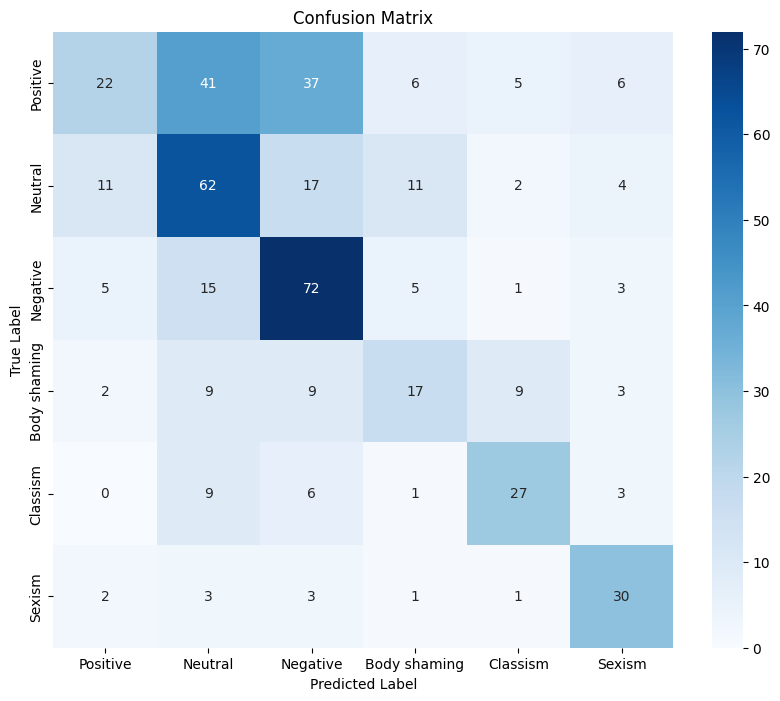

In [ ]:
model.load_state_dict(torch.load('sentiment_model_gru.pt', map_location=device))
model.eval()
_, _, y_true_test, y_pred_test = evaluate(model, test_iter, criterion, encoder)

# Create the confusion matrix using the test data
cm = confusion_matrix(y_true_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')

plt.show()

In [ ]:
import pandas as pd
import json  # Import json for loading idx2lab

# โหลดข้อมูล (แก้ไข path ตามไฟล์ของคุณ)
df = pd.read_csv("TextClass.csv")  # ไฟล์ต้องมี columns: "sentence", "true_label", "predicted_label"

# ดูตัวอย่างข้อมูล
print(df.head())

# Rename "label" column to "true_label"
df = df.rename(columns={"label": "true_label"})

# Add a new column "predicted_label" and fill it with predictions
with open('idx2lab.json', 'r') as f:
    idx2lab = json.load(f)

# Function to predict for a single row
def predict_row(row):
    sentiment = predict_sentiment(model, row['review'])
    predicted_class_index = torch.argmax(sentiment).item()
    predicted_class_label = idx2lab[str(predicted_class_index)]
    return predicted_class_label

# Apply prediction function to each row to create "predicted_label"
df['predicted_label'] = df.apply(predict_row, axis=1)


# Now you can use this new column for filtering and error analysis
print(df[(df["true_label"] == "Negative") & (df["predicted_label"] == "Positive")])

# Initialize misclassified
misclassified = df[(df["true_label"] != df["predicted_label"])]

# Display the results
print("ประโยคที่โมเดลทำนายผิดพลาด:")
print(misclassified)

                                  text  label
0  พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ      0
1           พี่เบ๊บบี้จัดฟันน่ารักมากก      0
2                         พี่สวยมากค่ะ      0
3                    งามมากกลูกสาวววว💛      0
4                             คนสวย🥰🥰🥰      0


KeyError: 'review'

In [ ]:
print(df[(df["true_label"] == "Negative") & (df["predicted_label"] == "Positive")])


In [ ]:
print(cm)

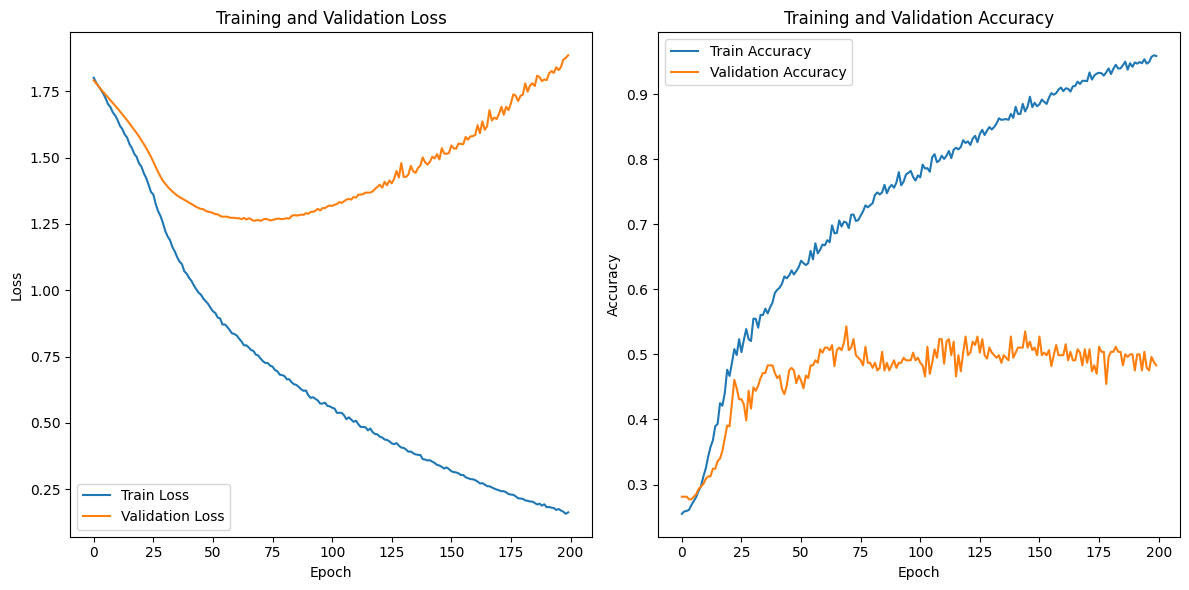

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

# Load pre-trained model and tokenizer (assuming you're using a Thai language model)
model_name = "airesearch/wangchanberta-base-att-spm-uncased"  # Replace with your actual model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(class_labels)) #added num_labels

# Define class labels - replace these with your actual class labels
# For example: ["negative", "neutral", "positive"]
class_labels = ['คำทั่วไปทางการชม', 'คำทั่วไป', 'คำหยาบปกติ', 'เหยียดรูปร่าง', 'เหยียดชนชั้น', 'เหยียดเพศ']

def predict_sentiment(model, tokenizer, text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)

    return probabilities, inputs

def get_word_embeddings(model, tokenized_inputs):
    # Extract embeddings from the model's embedding layer
    with torch.no_grad():
        # Access the embedding layer (this may need adjustment based on your model architecture)
        embedding_layer = model.get_input_embeddings()
        word_embeddings = embedding_layer(tokenized_inputs['input_ids'])

    return word_embeddings

# Function to get user input and display prediction
def analyze_user_input():
    # Get user input
    user_text = input("กรุณาใส่ข้อความที่ต้องการวิเคราะห์ความรู้สึก: ")

    # Make prediction
    sentiment, tokenized_inputs = predict_sentiment(model, tokenizer, user_text)
    print("Raw prediction tensor:", sentiment)

    # Get predicted class index
    predicted_class_index = torch.argmax(sentiment).item()
    # predicted_class_index = min(predicted_class_index, len(class_labels) - 1)  # Clamp the index #removed

    # Get predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Display results
    print("\nผลการวิเคราะห์:")
    print("Predicted Class Index:", predicted_class_index)
    print("Predicted Class Label:", predicted_class_label)

    # Display probability distribution
    print("\nProbability distribution:")
    for i, label in enumerate(class_labels):
        #print(f"{label}: {sentiment[0][i].item():.4f}")
        print(f"{label}: {sentiment[0][i].item():.4f}") # Access elements using correct indexing

    # Get and display word embeddings
    word_embeddings = get_word_embeddings(model, tokenized_inputs)

    # Print token IDs and their corresponding words
    input_ids = tokenized_inputs['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    print("\n**Word Embeddings:**")
    print("Shape of embeddings:", word_embeddings.shape)
    print(f"Number of tokens: {len(tokens)}")

    # Print tokens and first few dimensions of their embeddings
    for i, token in enumerate(tokens):
        if token in tokenizer.all_special_tokens:
            continue  # Skip special tokens like [CLS], [SEP], etc.

        # Print token and a sample of its embedding (first 5 dimensions)
        embedding_sample = word_embeddings[0, i, :5].tolist()  # First 5 dimensions as example
        print(f"Token: '{token}', Embedding (first 5 dims): {embedding_sample}")

# Run the analysis
if __name__ == "__main__":
    print("==== Thai Sentiment Analysis ====")
    analyze_user_input()